## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Load the dataset

In [3]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [4]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

### 2. Compute the average bill amount for each day.

In [5]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [6]:
df.groupby('sex')['tip'].sum() #The Male gender is more generous in giving tips

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [7]:
df.groupby('time')['size'].sum() # there were more customers for dinner

time
Dinner    463
Lunch     164
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [8]:
df.describe() # the average tip is 2.99, max tip=10 and min tip=1

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 6. Find the busiest day in terms of the orders?

In [9]:
df.groupby('day')['total_bill'].sum() # the busiest day would be Sunday considering more orders means more bill amount

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [10]:
df.groupby('day')['size'].sum() # the busiest day would be Saturday considering more orders means more people visiting

day
Fri      40
Sat     219
Sun     216
Thur    152
Name: size, dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [11]:
df['total_bill'].skew() # positive skew

1.1332130376158205

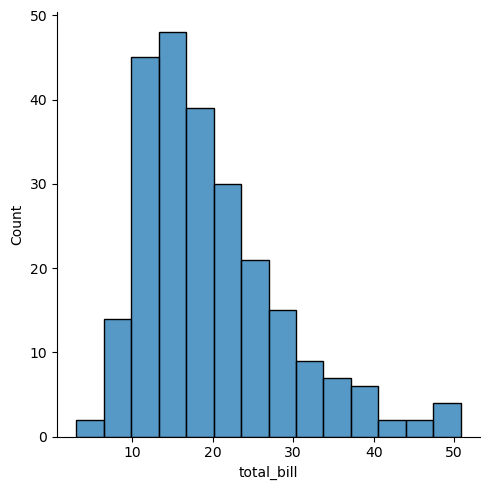

In [12]:
sns.displot(df['total_bill'])

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [13]:
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

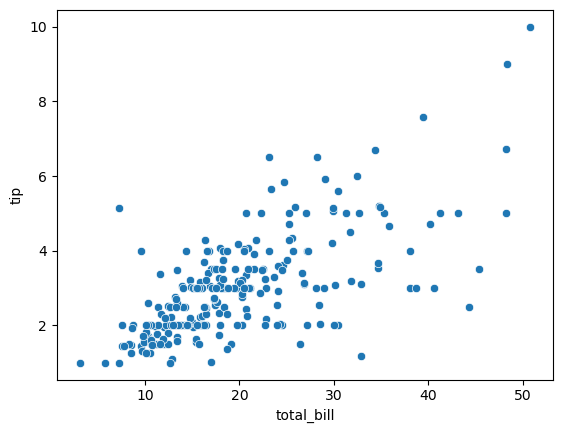

In [14]:
sns.scatterplot(x='total_bill',y='tip',data=df)

### 9. What is the percentage of males and females in the dataset? and display it in the plot

([<matplotlib.patches.Wedge at 0x238056959d0>,
 [Text(-0.47909423581850497, 0.9901862012800839, 'Male'),
  Text(0.4790942358185044, -0.9901862012800842, 'Female')],
 [Text(-0.2613241286282754, 0.5401015643345912, '64%'),
  Text(0.2613241286282751, -0.5401015643345913, '36%')])

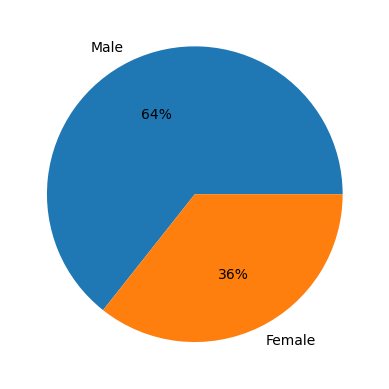

In [15]:
data=df['sex'].value_counts(normalize=True)
labels=['Male','Female']
plt.pie(data, labels=labels, autopct='%.0f%%')

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

<AxesSubplot:xlabel='sex'>

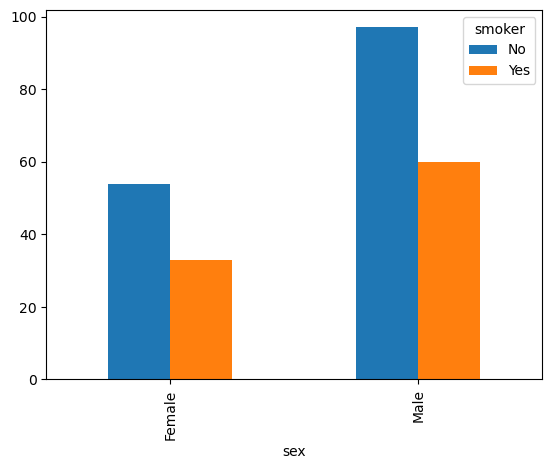

In [35]:
pd.crosstab(df['sex'],df['smoker']).plot(kind='bar')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [39]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<AxesSubplot:xlabel='day', ylabel='tip'>

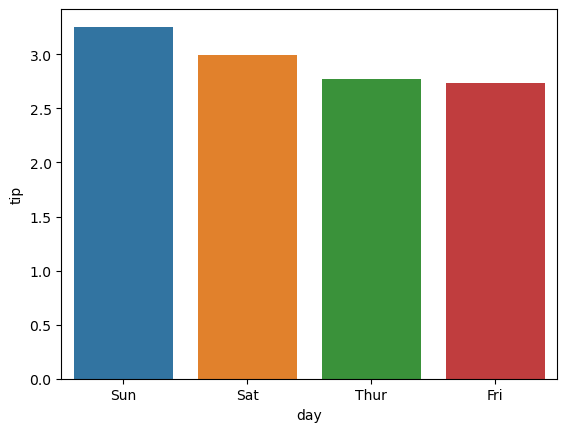

In [41]:
sns.barplot(x='day',y='tip',data=df,ci=False)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

<AxesSubplot:xlabel='size', ylabel='total_bill'>

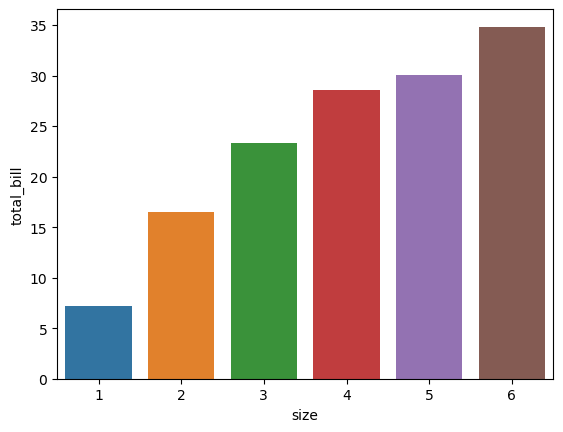

In [42]:
sns.barplot(x='size',y='total_bill',estimator=np.mean, ci=False, data=df)

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

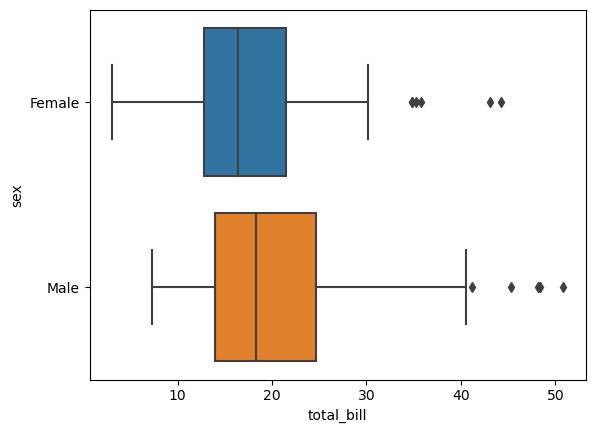

In [8]:
sns.boxplot(x = df['total_bill'],
            y = df['sex'],orient="h")

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [44]:
df.groupby(['day','time'])['total_bill'].max() 
# max bill amount for lunch=0 for both Saturday and Sunday. Max bill amount for dinner=50.81 for Saturday and dinner=48.17 for Sunday

day   time  
Fri   Dinner    40.17
      Lunch     16.27
Sat   Dinner    50.81
Sun   Dinner    48.17
Thur  Dinner    18.78
      Lunch     43.11
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [47]:
(df.isnull().sum()/len(data))*100 # there are no missing values

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [6]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [7]:
df.drop_duplicates() # no of rows has reduced from 244 to 243

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<AxesSubplot:xlabel='total_bill'>

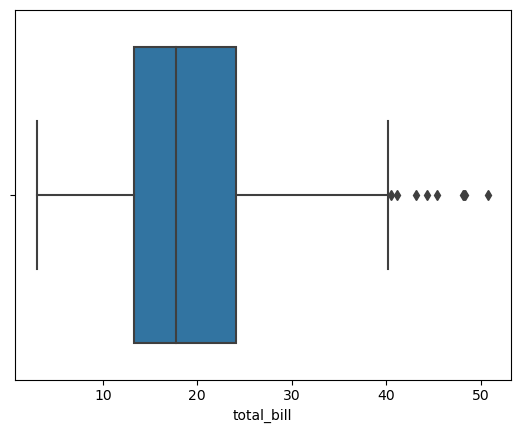

In [8]:
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill'>

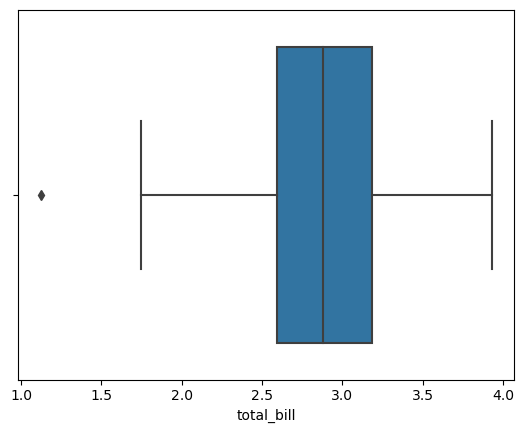

In [9]:
sns.boxplot(np.log(df['total_bill']))

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<AxesSubplot:xlabel='tip'>

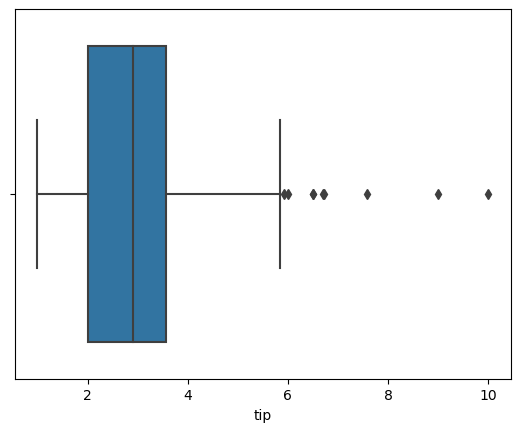

In [10]:
sns.boxplot(df['tip'])

In [11]:
q1 = df['tip'].quantile(0.25)
q2 = df['tip'].quantile(0.5)
q3 = df['tip'].quantile(0.75)

In [12]:
IQR = q3-q1

In [13]:
upper_limit = q3+1.5*(IQR)
lower_limit = q1-1.5*(IQR)

In [14]:
data_wo_out = df.loc[(df['tip'] > lower_limit) & (df['tip'] < upper_limit)]

<AxesSubplot:xlabel='tip'>

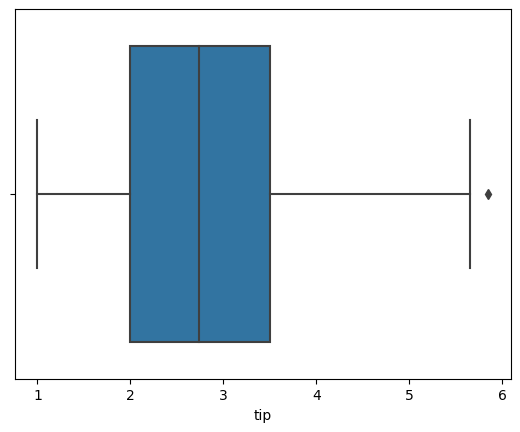

In [15]:
sns.boxplot(data_wo_out['tip'])

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [16]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [17]:
cat_data =df[['sex','smoker','day','time']]
pd.get_dummies(cat_data,drop_first=True).head(5)

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0,0,0,1,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,0,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [69]:
df['total_bill'].min()

3.07

In [70]:
df['total_bill'].max()

50.81

In [73]:
mm = MinMaxScaler()
df['total_bill'] = mm.fit_transform(df[['total_bill']])

In [74]:
df['total_bill'].max()

0.9999999999999999

In [75]:
df['total_bill'].min()

0.0

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [18]:
tips_df3 = pd.read_csv('tips.csv')

In [19]:
tips_df3.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
#label Ecoding multiple colums
tips_df3.iloc[:,[2,3,4,5]] = tips_df3.iloc[:,[2,3,4,5]].apply(le.fit_transform)

In [22]:
#Check the columns after label encoding
tips_df3.iloc[:,[2,3,4,5]].head()

,sex,smoker,day,time
0,0,0,2,0
1,1,0,2,0
2,1,0,2,0
3,1,0,2,0
4,0,0,2,0


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [23]:
# isoloting dependent variable
X = tips_df3.drop('tip', axis=1)
Y = tips_df3['tip']

In [24]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [25]:
Y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test, = train_test_split(X, Y, test_size=0.30, random_state=1)

In [28]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(170, 6) (74, 6)
(170,) (74,)


In [29]:
#using sklearn min max scaler
mms = MinMaxScaler()
X_train['total_bill'] = mms.fit_transform(X_train[['total_bill']])

In [30]:
X_train['size'] = mms.fit_transform(X_train[['size']])

In [31]:
X_train.head(5)

,total_bill,sex,smoker,day,time,size
59,0.998591,1,0,1,0,0.6
102,0.905355,0,1,1,0,0.4
147,0.143729,0,0,3,1,0.2
223,0.240254,0,0,0,1,0.4
88,0.445279,1,0,3,1,0.2


In [38]:
X_test['total_bill'] = mms.fit_transform(X_test[['total_bill']])
X_test['size'] = mms.fit_transform(X_test[['size']])
X_test.head(5)

,total_bill,sex,smoker,day,time,size
67,0.000000,0,1,1,0,0.00
243,0.329074,0,0,3,0,0.25
206,0.492669,1,1,1,0,0.50
122,0.234395,1,0,3,1,0.25
89,0.378928,1,0,3,1,0.25


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [32]:
from sklearn.linear_model import LinearRegression 

In [33]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [34]:
#exploring coefficients
for idx, col_name in enumerate(X_train.columns):
    print("the coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

the coefficient for total_bill is 3.966711343622093
the coefficient for sex is -0.0787433927218897
the coefficient for smoker is -0.2066156706134291
the coefficient for day is -0.1366503746293442
the coefficient for time is 0.2669551027614664
the coefficient for size is 0.7647923607690797


In [36]:
#checking intercept 
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.7141291503170857


In [39]:
#running model on test data and printing r2 value
regression_model.score(X_test,Y_test)

0.4120365792384636

### Happy Learning:)